In [1]:
import earthkit
import cartopy.crs as ccrs

In [2]:
CHANNEL = 5

In [3]:
data = earthkit.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/amsua.odb")
df = data.to_pandas()
df = df.loc[(df["vertco_reference_1@body"]==CHANNEL)]

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/pyodc/reader.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, data in reduced.iteritems():


In [4]:
x = df["lon@hdr"].values
y = df["lat@hdr"].values
values = df["obsvalue@body"].values

In [5]:
style = earthkit.maps.styles.Scatter(
    colors="turbo",
    levels=range(225, 271, 5),
    legend_type="histogram",
)

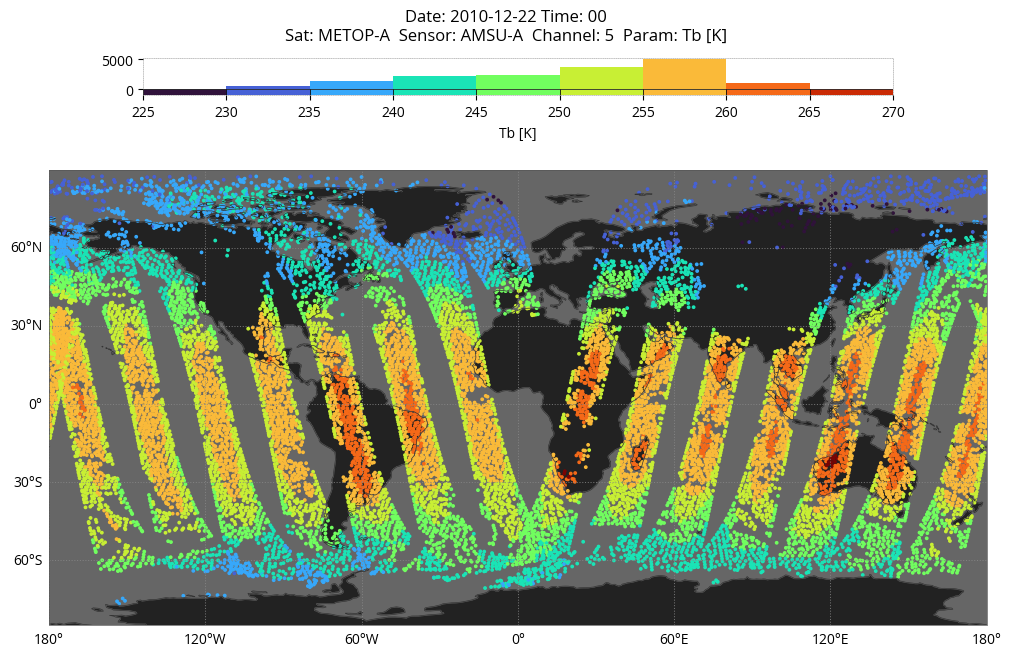

In [6]:
chart = earthkit.maps.Superplot()

chart.plot(values, x=x, y=y, style=style, transform=ccrs.Geodetic())

chart.coastlines()
chart.gridlines()

chart.land(color="#222")
chart.ocean(color="#666")

chart.title(
    "Date: 2010-12-22 Time: 00\n"
    f"Sat: METOP-A  Sensor: AMSU-A  Channel: {CHANNEL}  Param: Tb [K]"
)

chart.legend(location="top", label="Tb [K]")

chart.show()